In [16]:
from gan import gan
import matplotlib.pyplot as plt
import numpy as np

In [2]:
starwars = gan()
starwars.make_generator()
starwars.make_discriminator()
starwars.model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
__________

In [3]:
import pandas as pd
dfile = '../notebooks/subsampled.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.218025,0.327429,0.061153,-0.313490,-0.083840,0.170947,0.712686,0.126352,0.167447,0.276619,...,-0.164109,0.130676,0.142329,-0.987288,-0.567605,-0.618738,-0.216733,0.331532,0.318277,0.963297
1,0.383499,-0.006561,-0.451410,-0.452365,-0.148724,0.163417,0.652285,0.327991,0.324744,0.219113,...,-0.161374,-0.516011,0.292533,-0.723104,-0.336234,-0.954766,-0.128803,0.444141,0.383425,0.952270
2,0.426076,-0.050295,-0.689354,-0.531850,-0.148613,0.141136,0.565703,0.605060,0.521936,0.218723,...,-0.021378,-1.000000,0.404114,-0.376452,-0.265591,-0.966140,0.824113,0.653471,0.504843,0.929161
3,0.651114,-0.085873,-0.405833,-0.704819,0.038019,0.268122,0.513000,0.653959,0.573359,0.063392,...,-0.257099,-0.865512,0.370643,-0.185680,-0.301610,-0.730932,-0.106824,0.696511,1.000000,0.675593
4,0.850212,-0.217274,0.076044,-0.809618,0.007103,0.293927,0.552851,0.568672,0.597764,-0.038057,...,-0.023600,-0.517605,0.315868,-0.030927,-0.301473,-0.280888,0.052639,0.735776,0.848634,0.409688


In [4]:
print(df.values.T.shape)

(16384, 96)


In [5]:
starwars.X_train = df.values.T

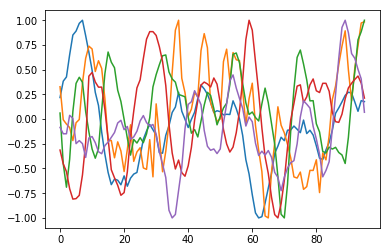

In [27]:
starwars.plot_some_data(nd=5)

In [7]:
starwars.train(epochs=200)

Epoch: 0 D loss: 0.8397172689437866 G loss: 1.091763973236084
Epoch: 10 D loss: 0.6726080179214478 G loss: 0.8091784715652466
Epoch: 20 D loss: 0.692771315574646 G loss: 0.6888301968574524
Epoch: 30 D loss: 0.6924259066581726 G loss: 0.644869327545166
Epoch: 40 D loss: 0.7042043209075928 G loss: 0.6674202680587769
Epoch: 50 D loss: 0.6976032257080078 G loss: 0.6805746555328369
Epoch: 60 D loss: 0.6986318826675415 G loss: 0.6897150278091431
Epoch: 70 D loss: 0.694138765335083 G loss: 0.6902812719345093
Epoch: 80 D loss: 0.6961323022842407 G loss: 0.6853578090667725
Epoch: 90 D loss: 0.6933208703994751 G loss: 0.6898741126060486
Epoch: 100 D loss: 0.6966421604156494 G loss: 0.6875986456871033
Epoch: 110 D loss: 0.6952272653579712 G loss: 0.6888773441314697
Epoch: 120 D loss: 0.6957286596298218 G loss: 0.6892150640487671
Epoch: 130 D loss: 0.6940786838531494 G loss: 0.692283570766449
Epoch: 140 D loss: 0.6949456930160522 G loss: 0.6919060349464417
Epoch: 150 D loss: 0.6946883797645569 G l

Fake images shape : (2, 96)


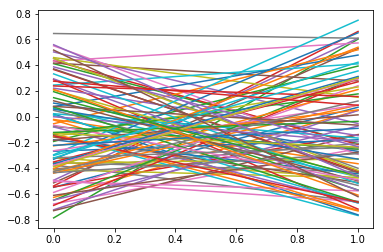

In [28]:
starwars.make_img(2)
plt.show()

Fake images shape : (5, 96)


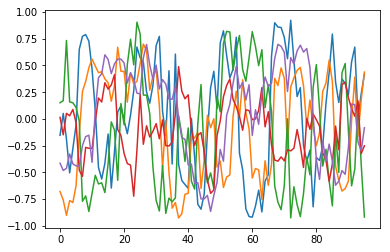

In [36]:
nd = 5
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)
print(f'Fake images shape : {fake_images.shape}')
fig, ax = plt.subplots()
ax.plot(fake_images.T)

(0.01, 1000.0)

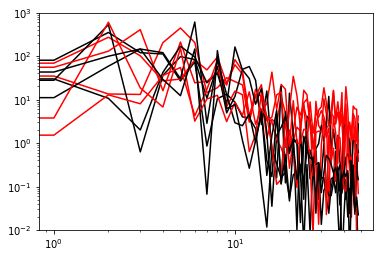

In [37]:
fig, ax = plt.subplots()
for i in range(nd):
    ax.plot(np.abs(np.fft.rfft(fake_images[i,:]))**2, 'r-')
    ax.plot(np.abs(np.fft.rfft(starwars.X_train[i,:]))**2, 'k-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.01, 1e3])

In [34]:
nd = 100
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)

(0.01, 1000.0)

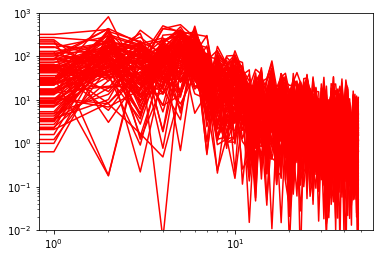

In [35]:
fig, ax = plt.subplots()
for i in range(nd):
    ax.plot(np.abs(np.fft.rfft(fake_images[i,:]))**2, 'r-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.01, 1e3])

(0.01, 1000.0)

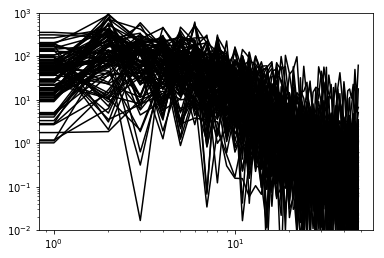

In [33]:
fig, ax = plt.subplots()
for i in range(nd):
    ax.plot(np.abs(np.fft.rfft(starwars.X_train[i,:]))**2, 'k-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.01, 1e3])